In [10]:
import pandas as pd

In [11]:
ms = pd.read_csv('../data/microsoft.csv', index_col='Date', parse_dates=True)

ms['ma10'] = ms['Close'].rolling(10).mean()  # fast signal
ms['ma50'] = ms['Close'].rolling(50).mean()  #slow signal

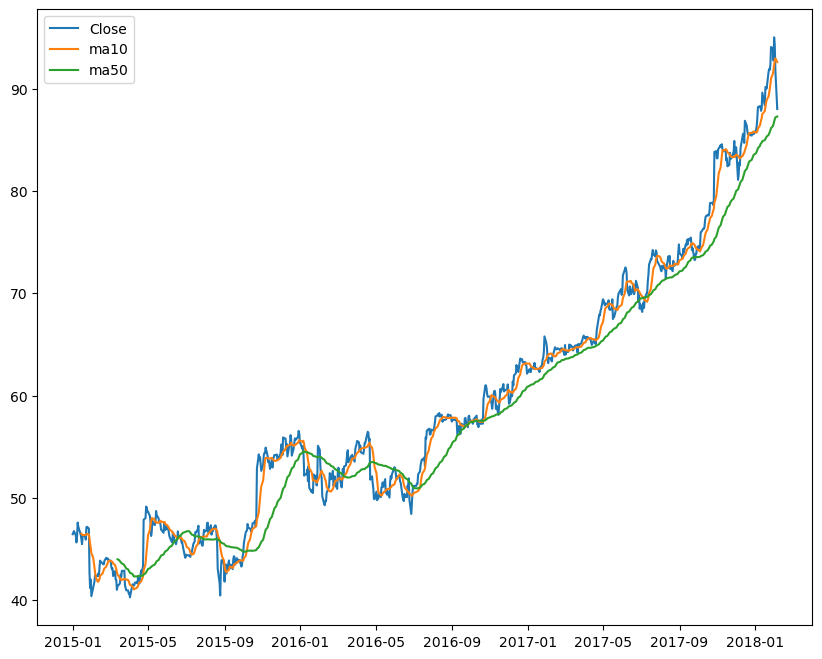

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

plt.plot(ms['Close'], label='Close')
plt.plot(ms['ma10'], label='ma10')
plt.plot(ms['ma50'], label='ma50')
plt.legend()
plt.show()


## Our Strategy will be:
    - if fast signal crosses above the slow signal, we buy;
    - if fast signal crosses below the slow signal, we sell.

In [13]:
#Long or not?
ms['Shares'] = [1 if ms.loc[i,'ma10'] > ms.loc[i,'ma50'] else 0 for i in ms.index]

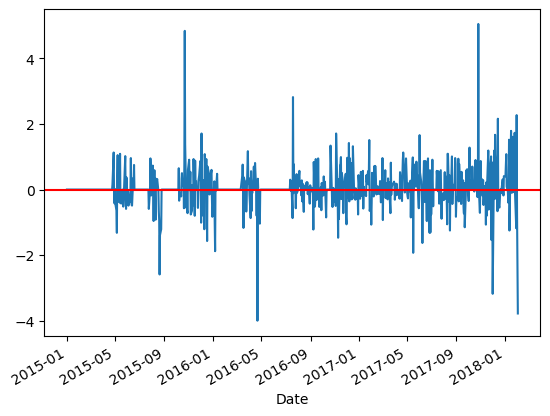

In [16]:
#now we add daily profit and total profit
ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[i, 'Close1'] - ms.loc[i, 'Close'] if ms.loc[i, 'Shares']==1 else 0 for i in ms.index]

ms['Profit'].plot()
plt.axhline(y=0, color='red')

In [17]:
#cumulative profit
ms['wealth'] = ms['Profit'].cumsum()
ms['wealth'].tail()

Date
2018-01-30    30.540009
2018-01-31    29.790009
2018-02-01    27.310006
2018-02-02    23.530007
2018-02-05          NaN
Name: wealth, dtype: float64

total profit: 23.53000699999999
total money spent: 46.450001


<Axes: xlabel='Date'>

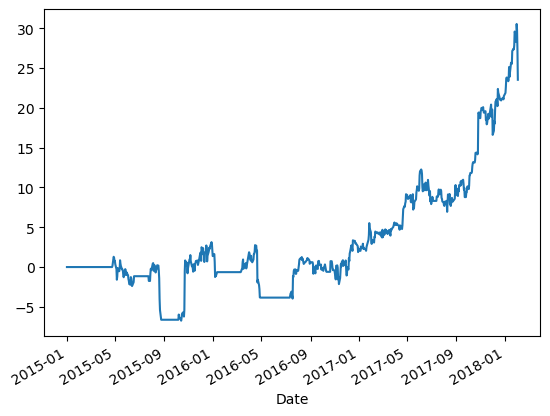

In [18]:
#print profit
print("total profit:", ms.loc[ms.index[-2], 'wealth'])
print("total money spent:", ms.loc[ms.index[0], 'Close'])

#plot wealth
ms['wealth'].plot()